In [1]:
#import pyvista
#import numpy as np
#built_grid = pyvista.UniformGrid(dimensions=(10, 10, 10), spacing=(2,5,1))
#built_grid["values"] = np.linspace(0, 1, 1000)
#circle = pyvista.Circle(15)
#plotter = pyvista.Plotter()
#plotter.add_mesh(built_grid)
#plotter.add_mesh(circle)
#plotter.show(auto_close = True)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dfAll = pd.read_fwf('ELEMENTS.COMET', skiprows=(1,))
dfAll

,Num Name,Epoch,q,e,i,w,Node,Tp,Ref
0,1P/Halley,39857,0.574716,0.967943,162.18787,112.25779,59.11448,1.986021e+07,JPL 73
1,2P/Encke,57421,0.335898,0.848356,11.78098,186.55103,334.56716,2.017031e+07,JPL K235/15
2,3D/Biela,-9480,0.879073,0.751299,13.21640,221.65880,250.66900,1.832113e+07,IAUCAT03
3,4P/Faye,58518,1.577468,0.584588,8.16358,205.97741,194.82502,2.021091e+07,JPL K212/28
4,5D/Brorsen,7440,0.589847,0.809796,29.38210,14.94680,102.96760,1.879033e+07,IAUCAT03
...,...,...,...,...,...,...,...,...,...
3853,C/2023 A1 (Leonard),59967,1.834774,0.992336,94.74620,159.24904,318.30523,2.023032e+07,JPL 5
3854,C/2023 A2 (SWAN),59995,0.951907,1.007677,94.70871,142.98412,94.54823,2.023012e+07,JPL 2
3855,P/2023 B1 (PANSTARRS),59974,6.141854,0.129204,14.58923,79.83303,78.60191,2.023041e+07,JPL 5
3856,C/2023 B2 (ATLAS),59969,1.742678,0.996330,40.76791,317.42928,218.10534,2.023031e+07,JPL 2


In [4]:
print(dfAll.columns)
print(dfAll['Num  Name'][0:10])

Index(['Num  Name', 'Epoch', 'q', 'e', 'i', 'w', 'Node', 'Tp', 'Ref'], dtype='object')
0           1P/Halley
1            2P/Encke
2            3D/Biela
3             4P/Faye
4          5D/Brorsen
5         6P/d'Arrest
6    7P/Pons-Winnecke
7           8P/Tuttle
8         9P/Tempel 1
9        10P/Tempel 2
Name: Num  Name, dtype: object


(array([3., 1., 5., 5., 2., 1., 5., 1., 3., 0., 0., 2., 2., 0., 0., 1., 0.,
        0., 1., 1., 2., 1., 2., 0., 0., 0., 0., 2., 2., 5., 0., 0., 0., 4.,
        2., 2., 2., 2., 1., 1., 0., 3., 0., 1., 3., 1., 2., 2., 0., 0.]),
 array([0.9999  , 0.999904, 0.999908, 0.999912, 0.999916, 0.99992 ,
        0.999924, 0.999928, 0.999932, 0.999936, 0.99994 , 0.999944,
        0.999948, 0.999952, 0.999956, 0.99996 , 0.999964, 0.999968,
        0.999972, 0.999976, 0.99998 , 0.999984, 0.999988, 0.999992,
        0.999996, 1.      , 1.000004, 1.000008, 1.000012, 1.000016,
        1.00002 , 1.000024, 1.000028, 1.000032, 1.000036, 1.00004 ,
        1.000044, 1.000048, 1.000052, 1.000056, 1.00006 , 1.000064,
        1.000068, 1.000072, 1.000076, 1.00008 , 1.000084, 1.000088,
        1.000092, 1.000096, 1.0001  ]),
 <BarContainer object of 50 artists>)

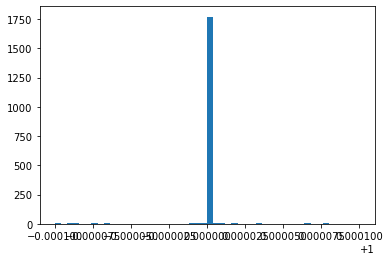

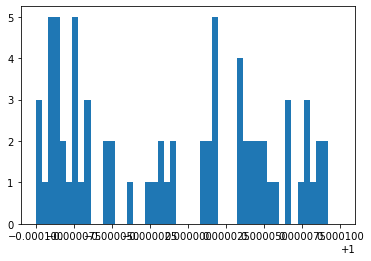

In [5]:
fig,ax = plt.subplots()
ax.hist(dfAll.e, range=(0.9999, 1.0001), bins=50)

df = dfAll.loc[(dfAll.e>1.00001)|(dfAll.e<0.99999)].copy()

fig,ax = plt.subplots()
ax.hist(df.e, range=(0.9999, 1.0001), bins=50)

In [6]:
df['K'] = -(1-df.e)/df.q
df['a'] = -1/df.K

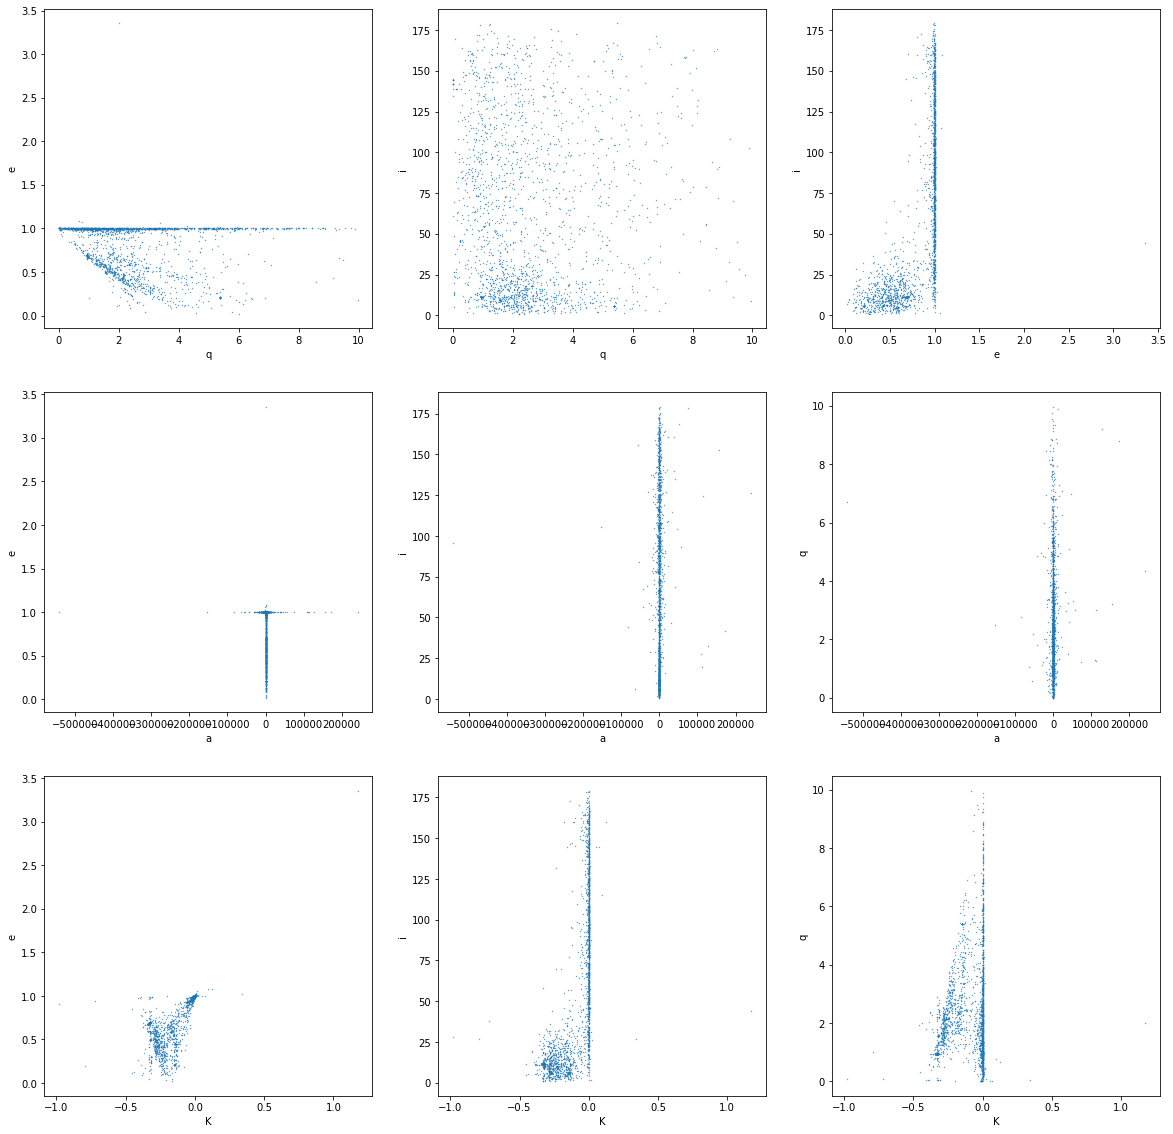

In [7]:
def plotEverythingComets(df):
    lPairs = [['q', 'e'],
    ['q', 'i'],
    ['e', 'i'],
    ['a', 'e'],
    ['a', 'i'],
    ['a', 'q'],
    ['K', 'e'],
    ['K', 'i'],
    ['K', 'q']]
    
    fig,axs = plt.subplots(3,3,figsize=(20,20))
    for n in range(9):
        l1,l2 = lPairs[n]
        ax = axs[np.unravel_index(n,(3,3))]
        ax.scatter(df[l1], df[l2], s=0.1)
        ax.set_xlabel(l1)
        ax.set_ylabel(l2)
        
        
plotEverythingComets(df)

In [9]:
JFC = (df.K<=-(20**(-2/3)))
LPC = (df.K>=-(200**(-2/3)))
other = np.logical_not(JFC|LPC)
#other = ((-(20**(-2/3))<df.K)&(df.K<-(200**(-2/3))))

def scatter(ax,x1,x2):
    labels = ['LPC', 'JFC', 'other']
    pops = [LPC, JFC, other]
    colors = ['blue', 'red', 'green']
    for i in range(len(pops)):
        ax.scatter(x1.loc[pops[i]], x2.loc[pops[i]], s=0.5, color=colors[i], label=labels[i])
    ax.set_xlabel(x1.name)
    ax.set_ylabel(x2.name)
    ax.legend()


In [10]:
0.19**(-1.5)

12.074512308976935

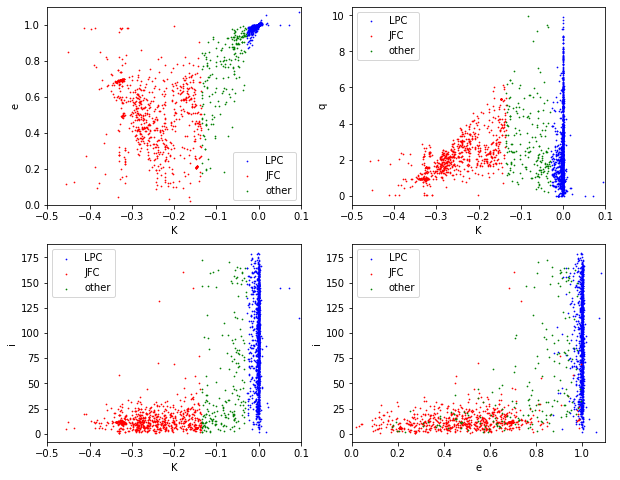

In [59]:
fig,axs = plt.subplots(2,2,figsize=(10,8))
scatter(axs[0,0], df.K, df.e)
axs[0,0].set_xlim(-0.5,0.1)
axs[0,0].set_ylim(0,1.1)
axs[0,0].set_xlabel('K')
axs[0,0].set_ylabel('e')

scatter(axs[1,0], df.K, df.i)
axs[1,0].set_xlim(-0.5,0.1)
axs[1,0].set_ylim()
axs[1,0].set_xlabel('K')
axs[1,0].set_ylabel('i')


#fig,axs = plt.subplots(1,2,figsize=(10,4))
scatter(axs[0,1], df.K, df.q)
axs[0,1].set_xlim(-0.5,0.1)
axs[0,1].set_xlabel('K')
axs[0,1].set_ylabel('q')

scatter(axs[1,1], df.e, df.i)
axs[1,1].set_xlim(0,1.1)
axs[1,1].set_xlabel('e')
axs[1,1].set_ylabel('i')
fig.savefig('comets', dpi=300)


In [24]:
dfAst = pd.read_table('asteroids.csv', sep=',')
dfAst

,e,a,q,i
0,0.0788,2.767,2.549,10.59
1,0.2301,2.770,2.132,34.93
2,0.2565,2.670,1.985,12.99
3,0.0888,2.363,2.153,7.14
4,0.1879,2.579,2.094,5.36
...,...,...,...,...
78433,0.1000,37.450,33.704,17.97
78434,0.2355,15.700,12.002,17.05
78435,0.1981,5.876,4.712,36.52
78436,0.0090,18.020,17.859,11.91


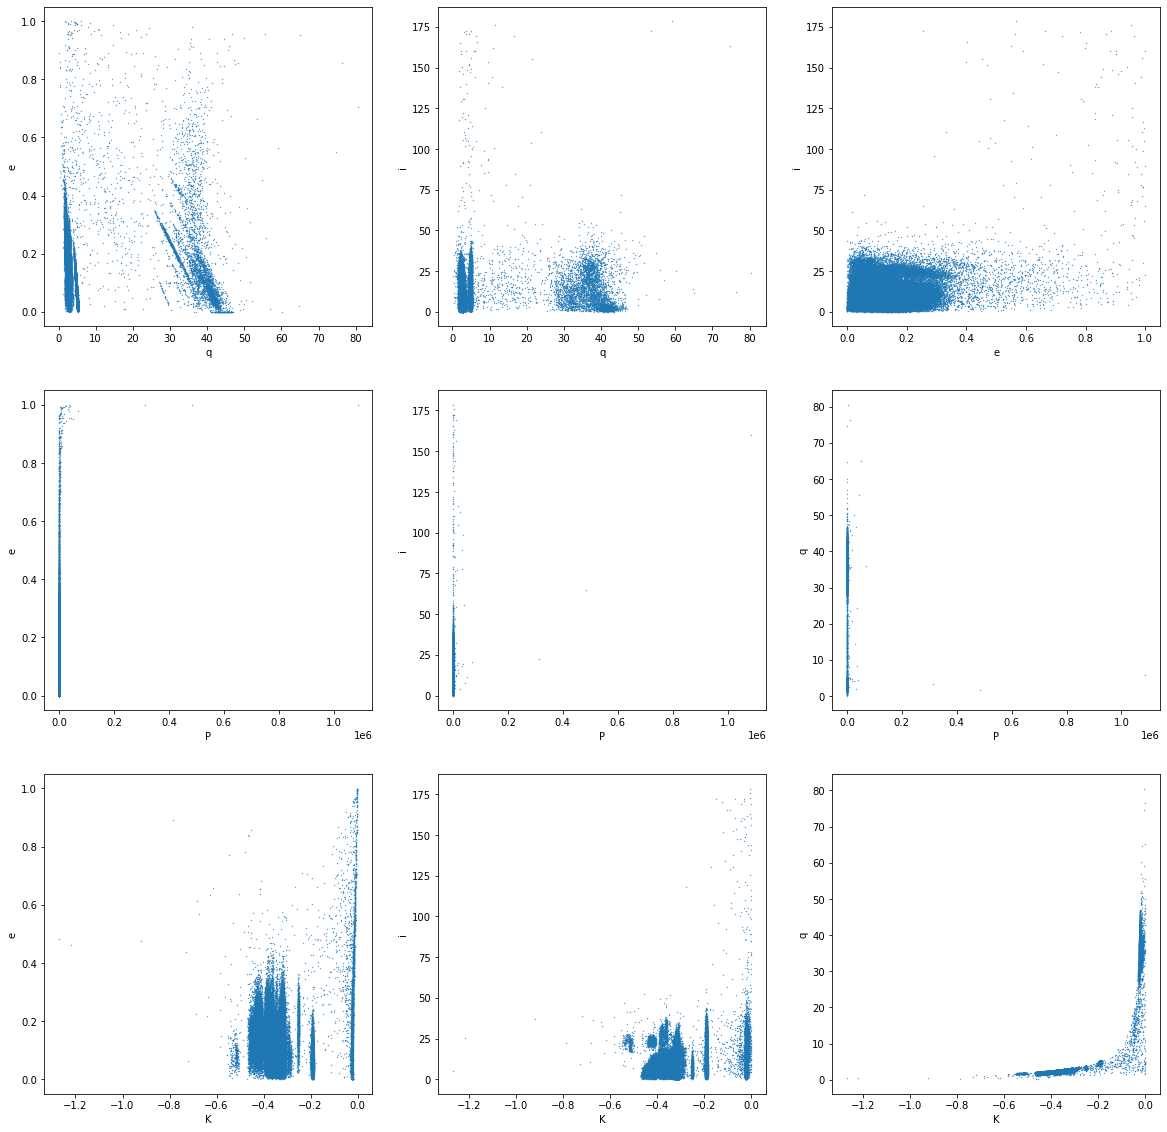

In [29]:
dfAst['P'] = dfAst.a**(3/2)
dfAst['K'] = -1/dfAst.a

def plotEverythingAst(df, jup):
    lPairs = [['q', 'e'],
    ['q', 'i'],
    ['e', 'i'],
    ['P', 'e'],
    ['P', 'i'],
    ['P', 'q'],
    ['K', 'e'],
    ['K', 'i'],
    ['K', 'q']]
    
    fig,axs = plt.subplots(3,3,figsize=(20,20))
    for n in range(9):
        l1,l2 = lPairs[n]
        ax = axs[np.unravel_index(n,(3,3))]
        ax.scatter(df[l1], df[l2], s=0.1)
        ax.set_xlabel(l1)
        ax.set_ylabel(l2)
        
    
    
    
plotEverythingAst(dfAst)

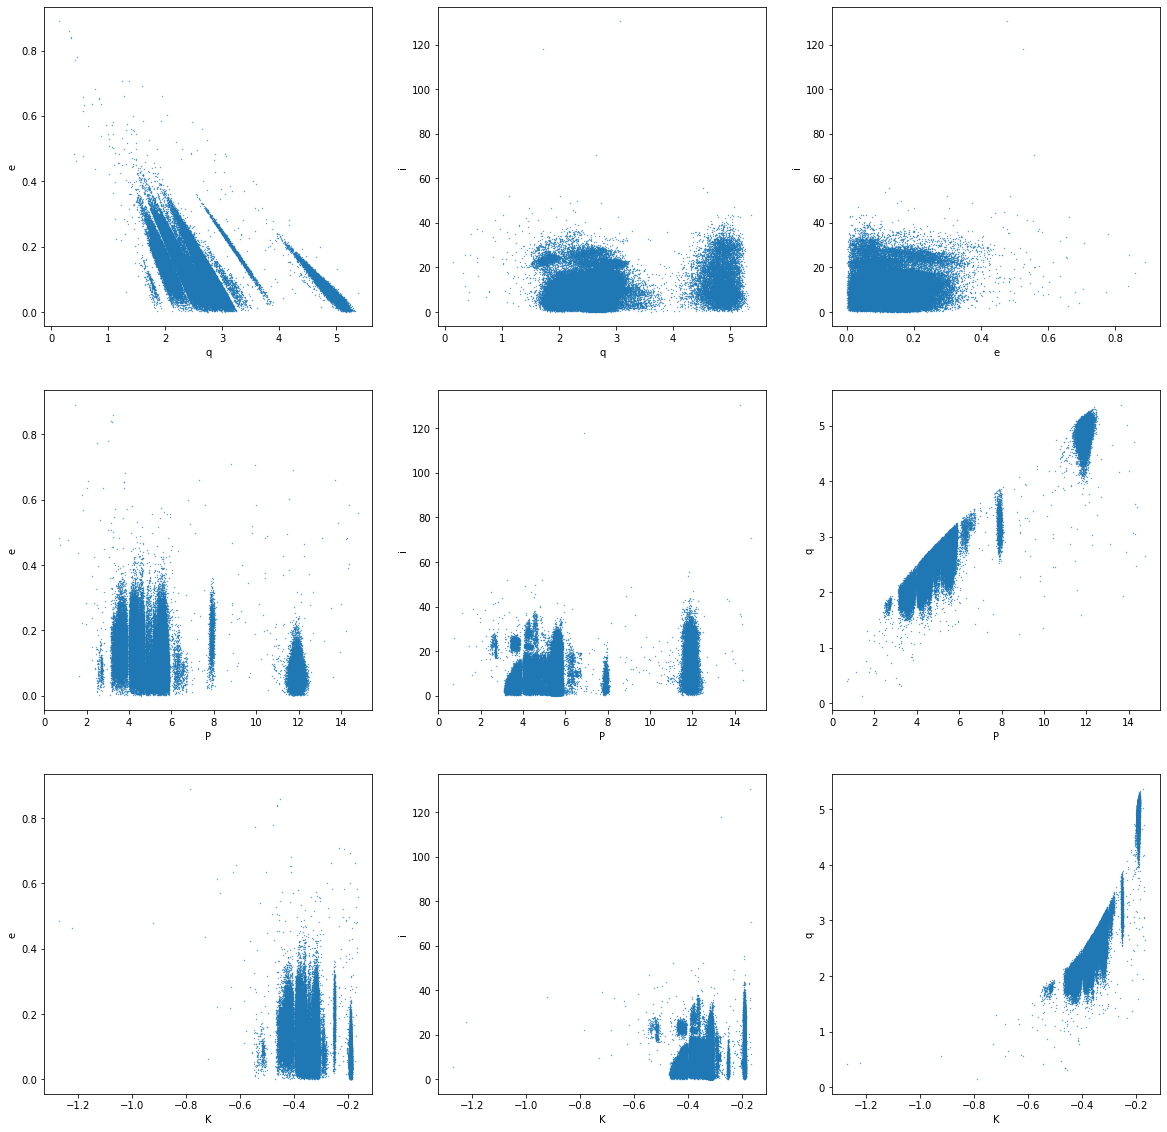

In [33]:
AB = dfAst.P<15
plotEverythingAst(dfAst.loc[AB])

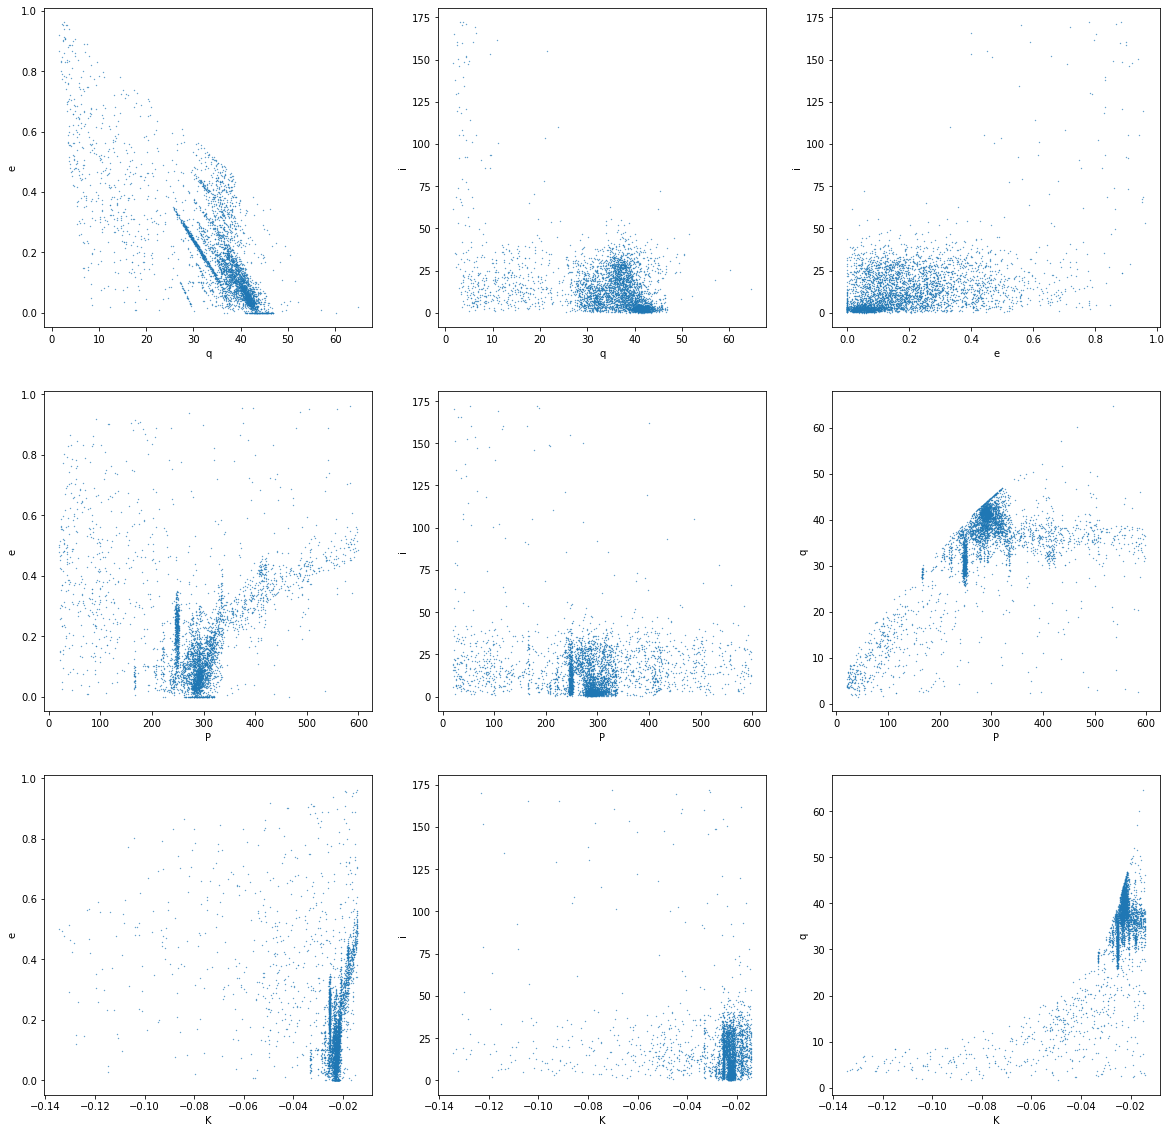

In [39]:
KB = (dfAst.P<600)&(dfAst.P>20)
plotEverythingAst(dfAst.loc[KB])

(0.0, 7.0)

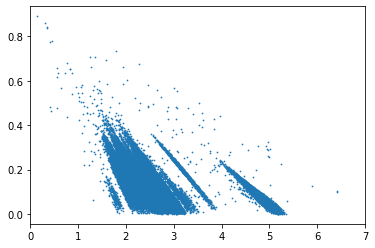

In [52]:
AST = dfAst.P<20

fig,ax=plt.subplots()
ax.scatter(dfAst.q[AST], dfAst.e[AST], s=0.5)
ax.axvline(164.8, linestyle='dashed', color='orange')
ax.axvline(164.8*3/2, linestyle='dashed', color='orange')
ax.set_xlim(0,7)
ax.set

(0.0, 600.0)

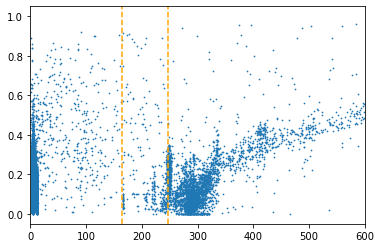

In [60]:
fig,ax=plt.subplots()
ax.scatter(dfAst.P, dfAst.e, s=0.5)
ax.axvline(164.8, linestyle='dashed', color='orange')
ax.axvline(164.8*3/2, linestyle='dashed', color='orange')
ax.set_xlim(0,600)

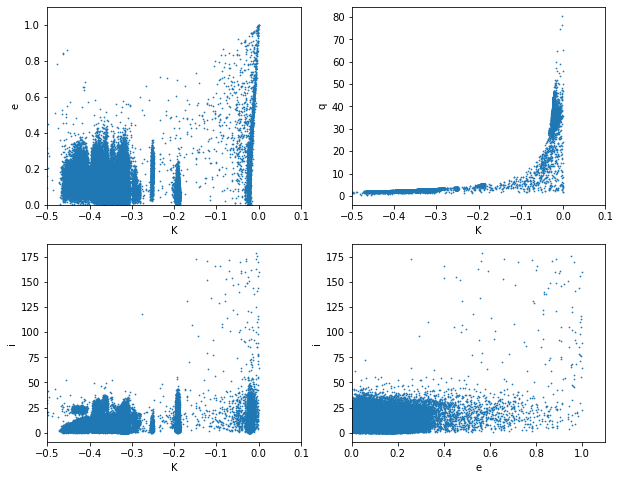

In [61]:
def scatter(ax,x1,x2):
    labels = ['LPC', 'JFC', 'other']
    pops = [LPC, JFC, other]
    colors = ['blue', 'red', 'green']
    ax.scatter(x1, x2, s=0.5)
    ax.set_xlabel(x1.name)
    ax.set_ylabel(x2.name)


fig,axs = plt.subplots(2,2,figsize=(10,8))
scatter(axs[0,0], dfAst.K, dfAst.e)
axs[0,0].set_xlim(-0.5,0.1)
axs[0,0].set_ylim(0,1.1)
axs[0,0].set_xlabel('K')
axs[0,0].set_ylabel('e')

scatter(axs[1,0], dfAst.K, dfAst.i)
axs[1,0].set_xlim(-0.5,0.1)
axs[1,0].set_ylim()
axs[1,0].set_xlabel('K')
axs[1,0].set_ylabel('i')


#fig,axs = plt.subplots(1,2,figsize=(10,4))
scatter(axs[0,1], dfAst.K, dfAst.q)
axs[0,1].set_xlim(-0.5,0.1)
axs[0,1].set_xlabel('K')
axs[0,1].set_ylabel('q')

scatter(axs[1,1], dfAst.e, dfAst.i)
axs[1,1].set_xlim(0,1.1)
axs[1,1].set_xlabel('e')
axs[1,1].set_ylabel('i')
fig.savefig('ast', dpi=300)